In [65]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import cv2 as cv

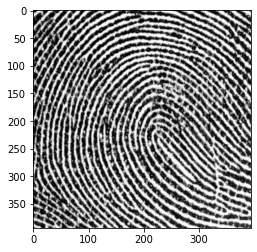

In [66]:
#setup
#Reading in grayscale
img = cv.imread('fp.jpg',0)
plt.imshow(img, cmap = 'gray')

### 1 - Obtenha a transformada rápida de Fourier $F(u,v)$ = $F${$f(x,y)$} usando o OpenCV e o Numpy

In [67]:
#transformada rápida de Fourier usando Numpy
f = np.fft.fft2(img) 
fR = f.real
fJ = f.imag
images = np.array([fR, fJ,np.log1p(np.abs(f))])
title = ['real', 'imaginária', 'módulo']

### 2 - Apresente as imagens $R_{e}${$F(u,v)$}, $Im${$F(u,v)$} e |$F(u,v)$|. Mostre as imagens com e sem o $\textit{fftshift()}$

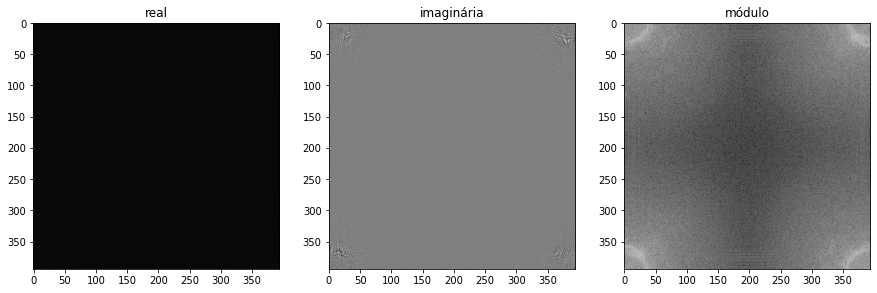

In [68]:
#plot sem fftshift
_, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
for i in range(len(images)):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(title[i])
plt.show()

In [69]:
#Aplicando fftshift
fShift = np.fft.fftshift(f)
fShiftR = fShift.real
fShiftJ = fShift.imag

imagesS = np.array([fShiftR,fShiftJ,np.log1p(np.abs(fShift))])
titleS = ['real', 'imaginária', 'módulo']

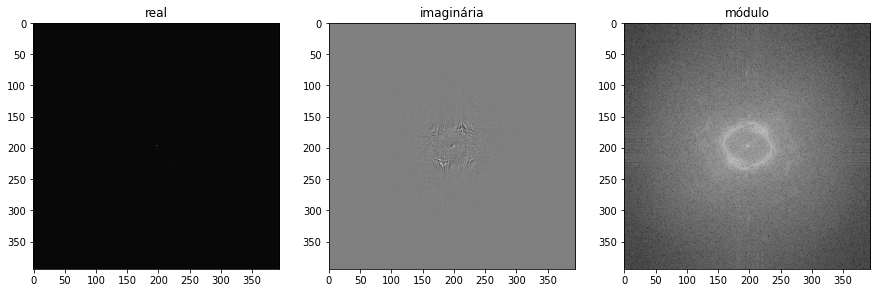

In [70]:
#plot com fftshift
_, ax = plt.subplots(1, len(imagesS), figsize=(5 * len(images), 5))
for i in range(len(imagesS)):
    ax[i].imshow(imagesS[i], cmap='gray')
    ax[i].set_title(title[i])
plt.show()

### 3 - Efetue um escalonamento adequado de |$F(u,v)$| para melhor vizualizar as baixas frequências

In [71]:
#usando escalonamento como log do valor abs de F + 1 (np.log1p calculates log(1 + x))
magnitude_spectrum = np.log1p(np.abs(f))
magnitude_spectrumS = np.log1p(np.abs(fShift))

result = np.array([magnitude_spectrum, magnitude_spectrumS])
titleR = ['sem shift', 'com shift']

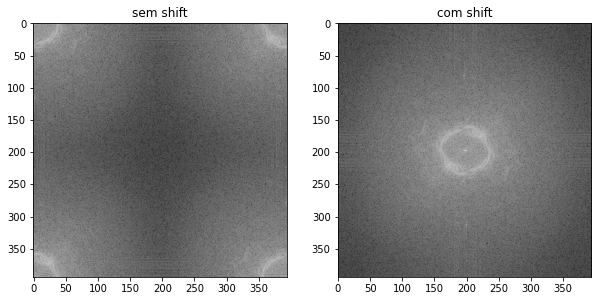

In [72]:
#plot do resultado escalonado com e sem shift
_, ax = plt.subplots(1, len(result), figsize=(5 * len(result), 5))
for i in range(len(result)):
    ax[i].imshow(result[i], cmap='gray')
    ax[i].set_title(titleR[i])
plt.show()

### 4 - Crie um filtro passa-baixas com resposta em frequência |$H(u,v)$| e apresente o resultado da filtragem da imagem $f(x,y)$ por esse filtro

In [73]:
#setup
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

In [74]:
#creating a mask lpf
lpfMask = np.zeros((rows,cols),np.uint8)
lpfMask[crow-47:crow+47, ccol-47:ccol+47] = 1
#convolution in freq. domain and recuperating the image 
lpfOutput = fShift * lpfMask #convolution in freq. domain == multiplication
lpf_F_ishift = np.fft.ifftshift(lpfOutput)
lpf_img_back = np.fft.ifft2(lpf_F_ishift)
lpf_img_back = np.real(lpf_img_back) #recuperating the image 

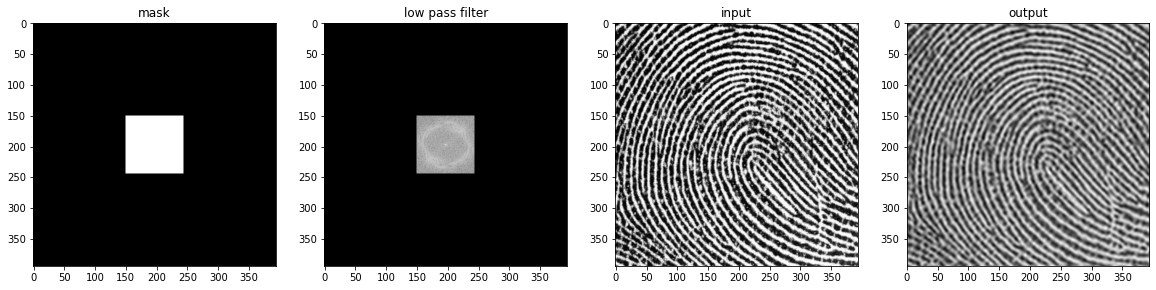

In [75]:
#ploting the results
lpfResult = np.array([lpfMask, (magnitude_spectrumS * lpfMask), img, lpf_img_back])
lpfTitle = ['mask','low pass filter', 'input', 'output']

_, ax = plt.subplots(1, len(lpfResult), figsize=(5 * len(lpfResult), 5))
for i in range(len(lpfResult)):
    ax[i].imshow(lpfResult[i], cmap='gray')
    ax[i].set_title(lpfTitle[i])
plt.show()

### 5 - Faça o mesmo para um filtro passa-altas

In [76]:
#creating a mask hpf
hpfMask = np.ones((rows,cols),np.uint8)
hpfMask[crow-47:crow+47, ccol-47:ccol+47] = 0
#convolution in freq. domain and recuperating the image 
lpfOutput = fShift * hpfMask #convolution in freq. domain == multiplication
hpf_F_ishift = np.fft.ifftshift(lpfOutput)
hpf_img_back = np.fft.ifft2(hpf_F_ishift)
hpf_img_back = np.real(hpf_img_back) #recuperating the image 

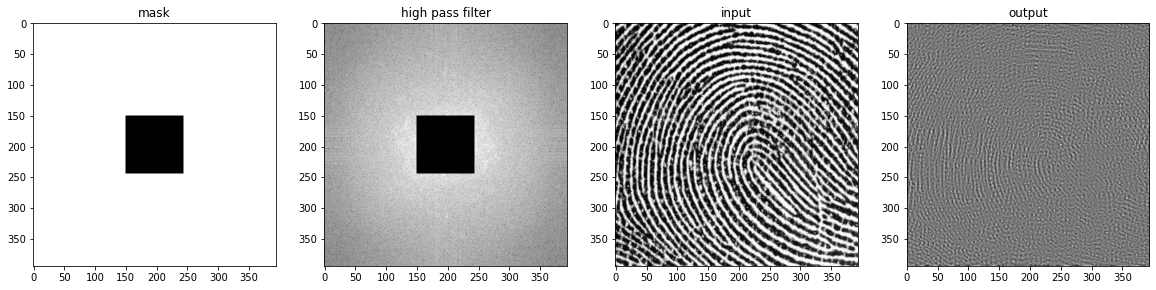

In [77]:
#ploting the results
hpfResult = np.array([hpfMask, (magnitude_spectrumS * hpfMask), img, hpf_img_back])
hpfTitle = ['mask','high pass filter', 'input', 'output']

_, ax = plt.subplots(1, len(hpfResult), figsize=(5 * len(hpfResult), 5))
for i in range(len(hpfResult)):
    ax[i].imshow(hpfResult[i], cmap='gray')
    ax[i].set_title(hpfTitle[i])
plt.show()